In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("churn_prediction_simple.csv")
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [8]:
data = data.dropna()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [11]:
# checking the dataset distribution
data['churn'].value_counts()/len(data)

churn
0    0.806317
1    0.193683
Name: count, dtype: float64

In [12]:
# seperrating dependent and independent variables
X = data.drop(columns = ['churn', 'customer_id'])
Y = data['churn']

In [13]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [17]:
# splitting the dataset
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_X, Y, train_size = 0.80,stratify = Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

# Model Building, prediction and odds ratio

In [18]:
from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight = 'balanced') # to emphasize the classes depending uponn the no. of observations present in the data


In [19]:
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_test) #predicting class
predicted_probabilities = classifier.predict_proba(x_test) # predicting probabilities

In [21]:
predicted_values

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [22]:
predicted_probabilities, predicted_probabilities.shape

(array([[0.4486302 , 0.5513698 ],
        [0.52235447, 0.47764553],
        [0.57733917, 0.42266083],
        ...,
        [0.63759587, 0.36240413],
        [0.50204567, 0.49795433],
        [0.35276725, 0.64723275]]),
 (4414, 2))

In [23]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, predicted_values)
cf

array([[2672,  887],
       [ 334,  521]], dtype=int64)

In [25]:
#Accuracy
classifier.score(x_test, y_test)

0.7233801540552787

In [26]:
# Precision
from sklearn.metrics import precision_score
Precision = precision_score(y_test, predicted_values)
Precision

0.3700284090909091

In [28]:
# recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, predicted_values)
Recall

0.6093567251461989

In [30]:
f1 = 2/((1/Precision)+(1/Recall))
f1

0.46045072912063634

In [31]:
from sklearn.metrics import f1_score
F1 = f1_score(y_test, predicted_values)
F1

0.46045072912063634

In [35]:
# calculating precision, recall, f1-score and support at once
# here support the no. of instances for the class 1 and class 0
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision, recall, f1, support = PRF_summary(y_test, predicted_values)

precision

array([0.81401371, 0.46045073])

In [37]:
recall

array([0.75077269, 0.60935673])

In [39]:
f1

array([0.81401371, 0.46045073])

In [40]:
from sklearn.metrics import classification_report
k = classification_report(y_test, predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      3559
           1       0.37      0.61      0.46       855

    accuracy                           0.72      4414
   macro avg       0.63      0.68      0.64      4414
weighted avg       0.79      0.72      0.75      4414



In [41]:
# precision recall curve
from sklearn.metrics import precision_recall_curve # it calculates the precision and recall for every threshold possible b/w the probabilities 0&1
precision_points, recall_points, threshold_points = precision_recall_curve(y_test, predicted_probabilities[:,1])
precision_points.shape, recall_points.shape, threshold_points.shape

((4415,), (4415,), (4414,))

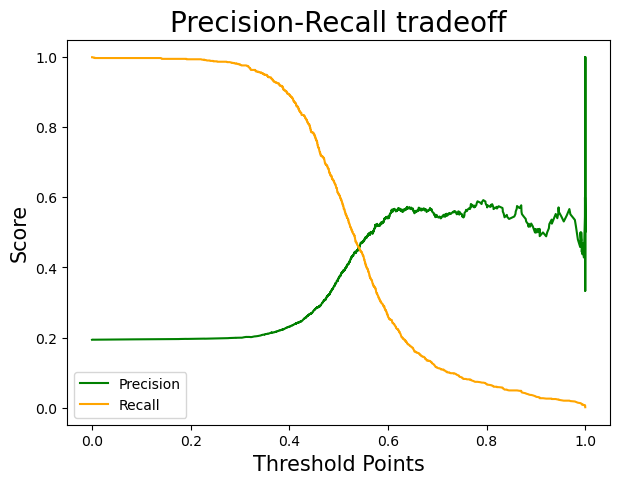

In [42]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot(threshold_points, precision_points[0:-1], color = 'green', label = 'Precision')
plt.plot(threshold_points, recall_points[:-1], color = 'orange', label = 'Recall')
plt.xlabel('Threshold Points', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.title('Precision-Recall tradeoff', fontsize = 20)
plt.legend()

# AUC-ROC Curve

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, predicted_probabilities[:,1])

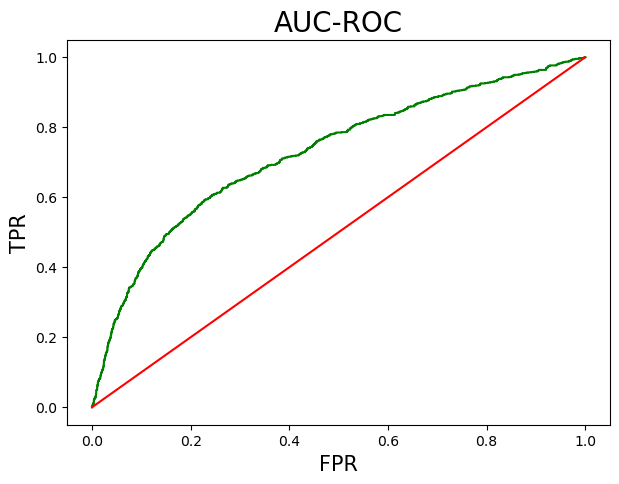

0.7260571584435473

In [44]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot(fpr, tpr, color ='green')
plt.plot([0,1], [0,1], label = 'baseline', color = 'red')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize =15)
plt.title('AUC-ROC', fontsize = 20)
plt.show()
roc_auc_score(y_test, predicted_probabilities[:,1])

# Coefficient Plot

In [45]:
# arranging data
c = classifier.coef_.reshape(-1)
x = X.columns

coeff_plot = pd.DataFrame({
    'coefficients':c,
    'variable': x
})

# sorting the values
coeff_plot = coeff_plot.sort_values(by = 'coefficients')
coeff_plot.head()

,coefficients,variable
9,-1.818502,current_balance
14,-0.267414,previous_month_credit
0,-0.178613,vintage
8,-0.123958,days_since_last_transaction
4,-0.097732,occupation


Text(0.5, 1.0, 'Coefficient plot')

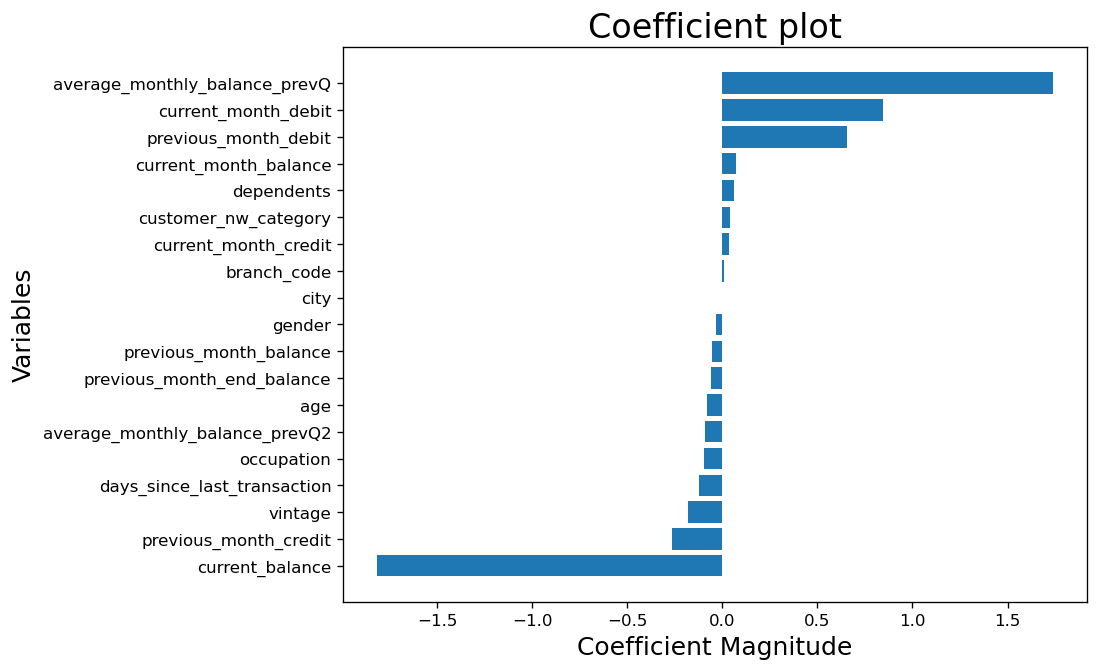

In [46]:
plt.figure(figsize = (8,6), dpi=120)
plt.barh(coeff_plot['variable'], coeff_plot['coefficients'])
plt.xlabel('Coefficient Magnitude', fontsize =15)
plt.ylabel('Variables', fontsize = 15)
plt.title("Coefficient plot", fontsize = 20)